In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def load_datasets(filename):
    
    df = pd.read_csv(filename, delimiter=',')
    X, y = df["A"], df["B"]
    return X, y

In [4]:
def split_datasets(X, y, test_size = 0.2):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [5]:
def plot_data(X_train, X_test, y_train, y_test):
    
    plt.scatter(X_train, y_train, marker='^', c='green')
    plt.scatter(X_test, y_test, marker='o', c='red')
    plt.show()

In [6]:
def normalize(X):
    
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0, ddof=1)
    X_norm = (X - mean) / std
    return X_norm, mean, std

In [7]:
def prepare_X(X):

    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [8]:
def hypothesis(X, theta):
    
    h_thetha = X.dot(theta);
    return h_thetha

In [9]:
def cost_function(X, y, theta):
   
    m = X.shape[0]
    J = 0
    if m == 0:
        return None
    else:
        J = np.sum(((hypothesis(X, theta) - y) ** 2))
        return J/(2*m)

In [10]:
def normal_eqn(X, y):
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [11]:
def derivative(X, y, theta):
    
    m = X.shape[0]
    d_t1 = (-2/m) * (X.dot(y - hypothesis(X, theta)))
    d_t2 = (-2/m)*  (X - hypothesis(X, theta))
    d_thtetha.append(d_t1)
    d_thtetha.append(d_t2)
    return d_thetha

In [12]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        theta = theta - alpha / m * ((X.dot(theta) - y).T.dot(X))
        J = cost_function(X, y, theta)
        ######################
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

In [13]:
def plot_J(X, y):

    theta_0 = np.linspace(-10, 10, 100)
    theta_1 = np.linspace(-1, 4, 100)
    
    J_vals = np.zeros((len(theta_0), len(theta_1)))
    for i, t0 in enumerate(theta_0):
        for j, t1 in enumerate(theta_1):
            theta = np.array([t0, t1])
            J_vals[i, j] = cost_function(X, y, theta)
    
    J_vals = J_vals.T
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(theta_0, theta_1, J_vals, color='b')
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Surface plot of the cost function')
    plt.show()
    plt.contour(theta_0, theta_1, J_vals, np.logspace(-2, 3, 20))
    plt.xlabel('theta_0')
    plt.ylabel('theta_1')
    plt.title('Contour plot of the cost function')
    plt.show()

In [15]:
X, y = load_datasets('burrito.csv')
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

Dataset: X=(97,), y=(97,)


In [16]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(77,), y=(77,)
Test set: X=(20,), y=(20,)


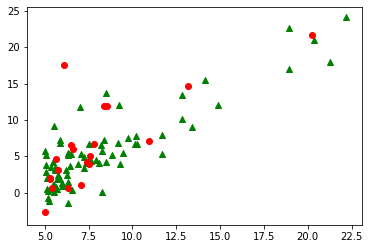

In [17]:
plot_data(X_train, X_test, y_train, y_test)

In [18]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train)
theta = np.array([0, 0])

In [19]:
y = y_train[:]

In [20]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (77, 2)
y: (77,)
30.241257440920776


In [21]:
alpha = 0.01
num_iters = 1500

In [1]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta 0: {}; Theta 1: {}'.format(new_theta[0], new_theta[1]))
theta_res = normal_eqn(X, y)
print('Theta 0: {}; Theta 1: {}'.format(theta_res[0],theta_res[1]))

NameError: name 'gradient_descent' is not defined

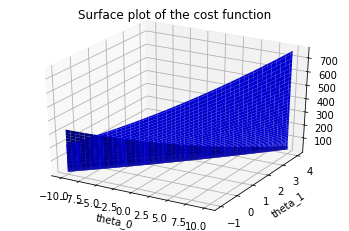

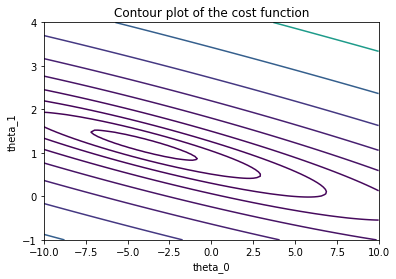

In [23]:
plot_J(X, y)

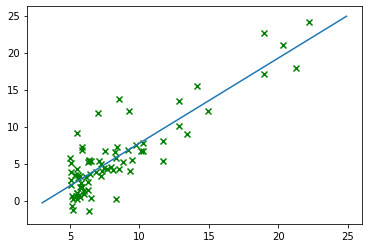

In [24]:
x = np.arange(3, 25, 0.1)
h = new_theta[0] + new_theta[1]*x

plt.plot(x, h)
plt.scatter(X_train, y_train, marker='x', c='green')

plt.show()

In [29]:
####################
# Нормалізувати тестовий датасет, використовуючи mean, std з тренувального
####################
X_test_proc = prepare_X(X_test)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) *100
diff = np.abs(y_test - y_test_pred)
res = pd.DataFrame({'X' : X_test, 'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

          X  y_actual     y_pred        err
51   5.3077   1.83960   2.353717   0.514117
82   6.3557   0.67861   3.559903   2.881293
53   7.6031   4.99810   4.995587   0.002513
7    8.5781  12.00000   6.117754   5.882246
21  20.2700  21.76700  19.574439   2.192561
57   5.6397   4.60420   2.735830   1.868370
76   7.5386   3.88450   4.921351   1.036851
44   7.8247   6.73180   5.250635   1.481165
0    6.1101  17.59200   3.277232  14.314768
45   7.0931   1.04630   4.408607   3.362307
52   7.4239   4.28850   4.789338   0.500838
5    8.3829  11.88600   5.893090   5.992910
74   5.0269  -2.68070   2.030533   4.711233
8    6.4862   6.59870   3.710101   2.888599
27  10.9570   7.04670   8.855727   1.809027
12   5.7340   3.15510   2.844363   0.310737
96   5.4369   0.61705   2.502419   1.885369
31   6.5894   5.99660   3.828878   2.167722
28  13.1760  14.69200  11.409665   3.282335
93   5.3054   1.98690   2.351070   0.364170
9.0046590212141
